In [2]:
#Importamos las librerías necesarias.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [4]:
#Leemos los archivos
test=pd.read_csv('dataset3_test.csv',names=['a','b','c'])
train=pd.read_csv('dataset3_train.csv',names=['a','b','c'])

In [51]:
#Separamos los puntos de las etiquetas para poder analizarlas por separado.
puntos_test1=test[['a','b']].to_numpy()
puntos_test3=test[['c']].to_numpy()
#------------------------#
puntos_train1=train[['a','b']].to_numpy()
puntos_train3=train[['c']].to_numpy()

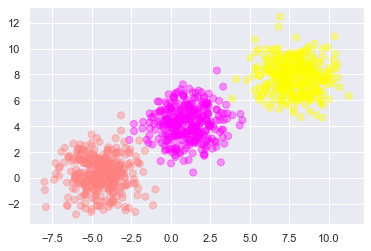

In [52]:
#Graficamos sólo los puntos
plt.scatter(train['a'], train['b'], s=50, c=train['c'],alpha=0.4, cmap='spring')

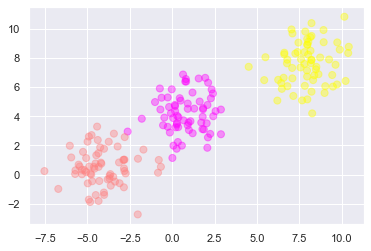

In [53]:
plt.scatter(test['a'], test['b'], s=50, c=test['c'],alpha=0.4, cmap='spring')

In [54]:
#Analizo las etiquetas, y si son iguales al valor de i, guardo el punto.
#Al final creamos un arreglo en donde vienen los 3 centros encontrados.
aux=[];p=[];c=[]
for i in range(3):
    for j in range(200):
        if puntos_train3[j]==i:
            aux.append(puntos_train1[j])
    p.append(aux)
    aux=[]
    c.append((np.sum(p[i],axis=0))/len(p[i]))
c=np.array(c)

In [76]:
#Celda usada para comprobar.
c.shape

(3, 2)

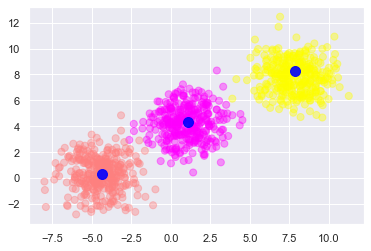

In [55]:
#Grafico de nuevo los puntos pero ahora incluyendo los centros.
plt.scatter(train['a'], train['b'], s=50, c=train['c'],alpha=0.4, cmap='spring')
plt.scatter(c[:, 0], c[:, 1], c='blue', s=100, alpha=0.9)

In [78]:
#Calculamos las distancias euclidianas entre cada punto y cada centro.
import math
def le(c,v):
    dis=[]
    for n in range(3):
        dis.append(np.sqrt(np.sum((c[n]-v)**2)))
    dis_min=math.floor(np.amin(dis))
    return dis,dis_min

M=[];PreLab=[]
for i in puntos_test1:
    aux,aux2=le(c,i)
    M.append(aux) 
    PreLab.append(aux2)

In [79]:
PreLab

[0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 3,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 0,
 1,
 2,
 0,
 2,
 3,
 4,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 3,
 0,
 1,
 1,
 3,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 3,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 3,
 0,
 2,
 1,
 3,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 3,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 3,
 0,
 3,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 1]

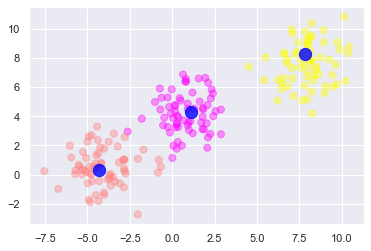

In [59]:
#Imprimimos
plt.scatter(test['a'], test['b'], s=50, c=test['c'],alpha=0.4, cmap='spring')
plt.scatter(c[:, 0], c[:, 1], c='blue', s=150, alpha=0.8)

In [80]:
#Ahora para la matriz de confusiones, usaremos los datos de prueba obtenidos y los valores reales leidos desde el
#principio
from sklearn.metrics import confusion_matrix
y_true=puntos_test3
y_pred=PreLab
confusion_matrix(y_true,y_pred)

array([[16, 32, 17,  2,  0],
       [19, 28, 15,  5,  0],
       [16, 22, 21,  6,  1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]], dtype=int64)